In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)

In [7]:
# pip install opencv-python


In [12]:
# pip install tensorflow


In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
from tensorflow.math import confusion_matrix

# Loading MNIST data

In [5]:
# in keras.dataset we imported mnsit data onwhich processing is alredy done
# msit is divided in to X_train,X_test,Y_train,Y_test 
# return value in touple ((X_train,Y_train),(X_test,Y_test))
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [7]:
# image is already converted into numpy array
print ((X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [9]:
# printing 11 th image from X_train
print(X_train[10]) # form ofnumpy

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [10]:
X_train[10].shape

(28, 28)

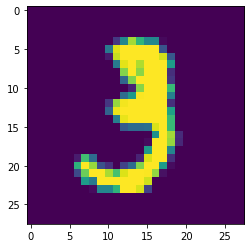

In [26]:
# to convert data back to image
mpl.imshow(X_train[10])
mpl.show()

In [27]:
# shoing corresponding label or digit labels
print (Y_train[10])


3


In [17]:
# uniue values in y train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [19]:
# normalize or scale imagevalue will range b/w min=0 to max=1
xtrain=X_train/255;
xtest=X_test/255;

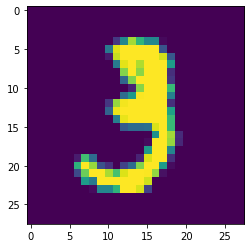

In [29]:
# no change in image due to scaling
mpl.imshow(xtrain[10])
mpl.show()

# Building normal nueral network 

In [32]:
# setting up layers for neural network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                       ])

In [33]:
# compiling layers of neural nmetwor
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model.fit(xtrain,Y_train,epochs=10) # epochs number is no of times to fix

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1375 - accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9854
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

In [37]:
loss,acu=model.evaluate(xtest,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9729


In [38]:
acu

0.9728999733924866

In [39]:
loss

0.10156846791505814

# Our model is  97.28999733924866 % data accurate

# loss=10.156846791505814 %

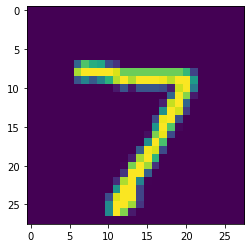

7


In [41]:
# first data point in xtest
mpl.imshow(xtest[0])
mpl.show()
print (Y_test[0])

In [42]:
ypred=model.predict(xtest)

313/313 [==============================] - 1s 1ms/step


In [43]:
ypred.shape

(10000, 10)

In [44]:
# in neural it calculate probalility of 10 label
print (ypred[0])

[4.7922734e-04 8.2030535e-01 5.9498131e-01 2.4105069e-01 1.4897507e-04
 3.2726186e-04 3.0815234e-10 9.9999923e-01 3.3727649e-03 3.5043126e-01]


In [50]:
# value with highest probablity get displayed
print (ypred[0].max())

0.9999992


In [51]:
# converting prediction probability to class labels
indexof1image=np.argmax(ypred[0])
indexof1image

7

In [64]:
resulty =np.array([])
resulty=[np.argmax(i) for i in ypred]
print (resulty)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [67]:
# confusion matrix
cm=confusion_matrix(Y_test,resulty)

In [68]:
print (cm)

tf.Tensor(
[[ 969    1    0    1    1    1    1    2    3    1]
 [   0 1122    2    1    0    2    2    1    5    0]
 [   3    1 1005    0    5    1    2    5   10    0]
 [   0    1    6  968    0   17    0    3    8    7]
 [   2    0    2    0  961    0    7    1    1    8]
 [   3    0    0    3    2  870    6    1    3    4]
 [   2    2    0    1    5    6  938    1    3    0]
 [   1    6    6    1    2    0    0  996    6   10]
 [   3    0    3    4    9    8    2    3  939    3]
 [   4    4    0    5   15    7    2    3    7  962]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

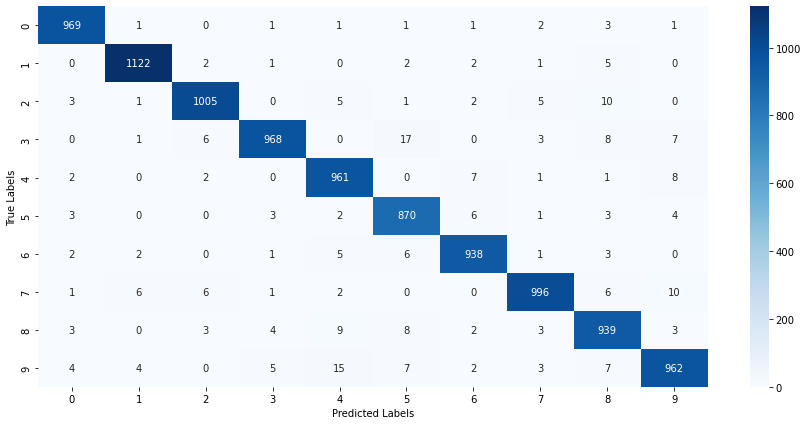

In [73]:
# heat map
mpl.figure(figsize=(15,7))
sb.heatmap(cm,annot=True,fmt='d',cmap='Blues')
mpl.ylabel('True Labels')
mpl.xlabel('Predicted Labels')

In [74]:
# diagonal represent true predction 
# most false  is of 3 predicted as 5 =18

# built predictive system

In [82]:
imname='Hi.jpg'
inp=cv2.imread(imname)

In [83]:
inp

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 0, 0],
        [4, 0, 0],
        [4, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 1, 0],
        [5, 1, 0],
        [5, 1, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]]], dtype=uint8)

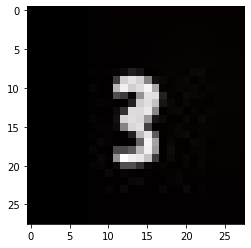

In [84]:
# display image
mpl.imshow(inp)
mpl.show()

In [85]:
inp.shape

(28, 28, 3)

In [86]:
# it is reading in form of rgb image converting into greyscale
inpc=cv2.cvtColor(inp,cv2.COLOR_RGB2GRAY)

In [88]:
inpc.shape

(28, 28)

In [89]:
# to resize image pixel
# inpr=cv2.resize(inpc,(28,28))

In [90]:
inpc=inpc/255  # to scale

In [91]:
inpc_reshape=np.reshape(inpc,[1,28,28])

In [92]:
# testing model

In [93]:
inpred=model.predict(inpc_reshape)
print (inpred)

1/1 [==============================] - 0s 130ms/step
[[1.3342212e-03 9.3435633e-01 6.8370253e-01 2.4417778e-03 4.8554566e-02
  4.7808839e-03 9.1314709e-05 4.7728384e-01 5.9478713e-04 7.1833408e-01]]


In [94]:
np.argmax(inpred)

1

In [95]:
# wrong prediction